In [2]:
# This is needed to import the CC and EC Models from this location in this project.
import sys
sys.path.append("..")

from MagneticFluxRopeModels.ECModel import ECModel
from MagneticFluxRopeModels.MagneticFluxRopeUtils import compute_intermediate_variance_axis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

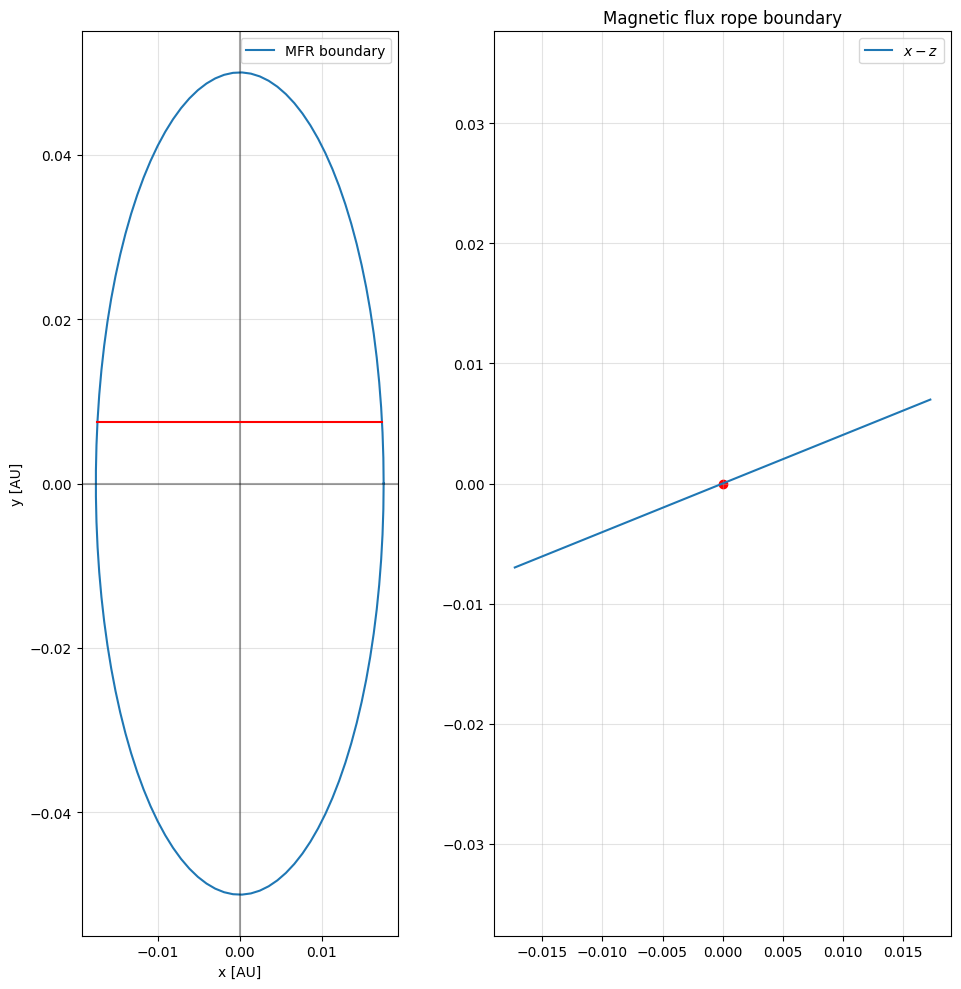

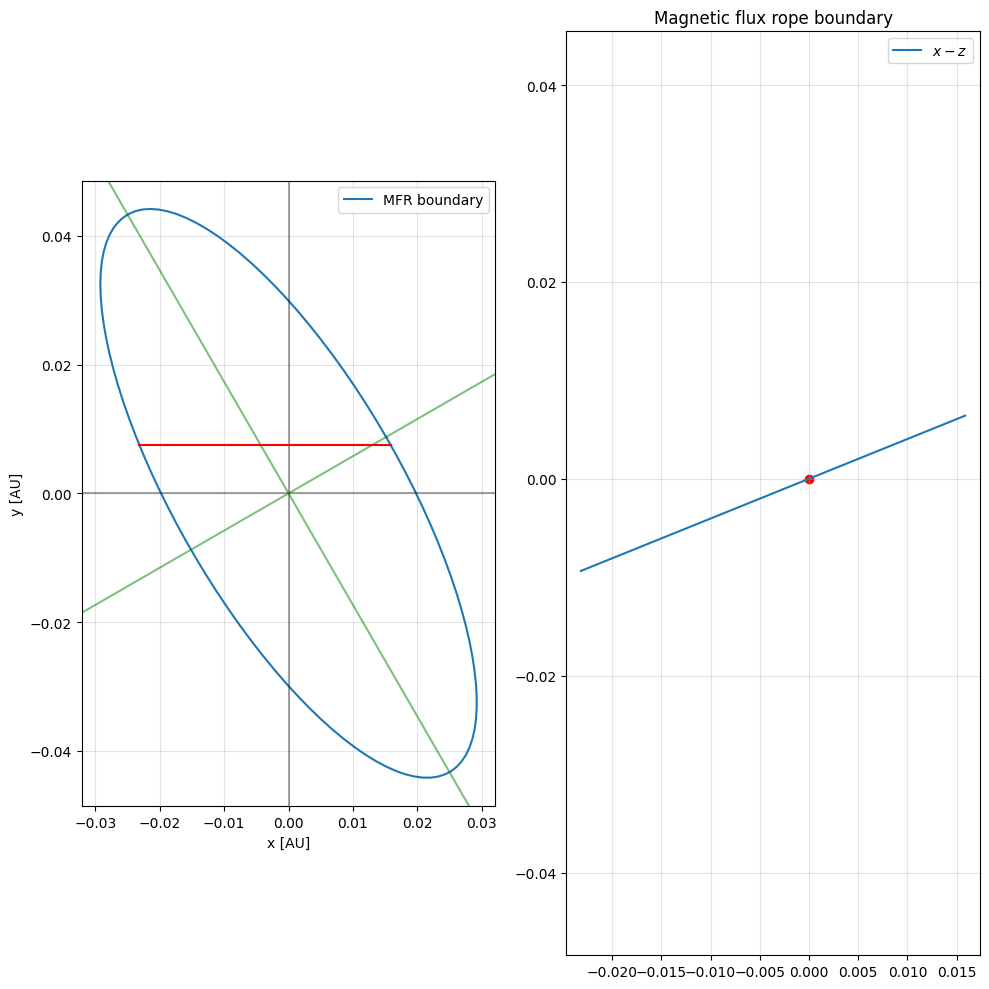

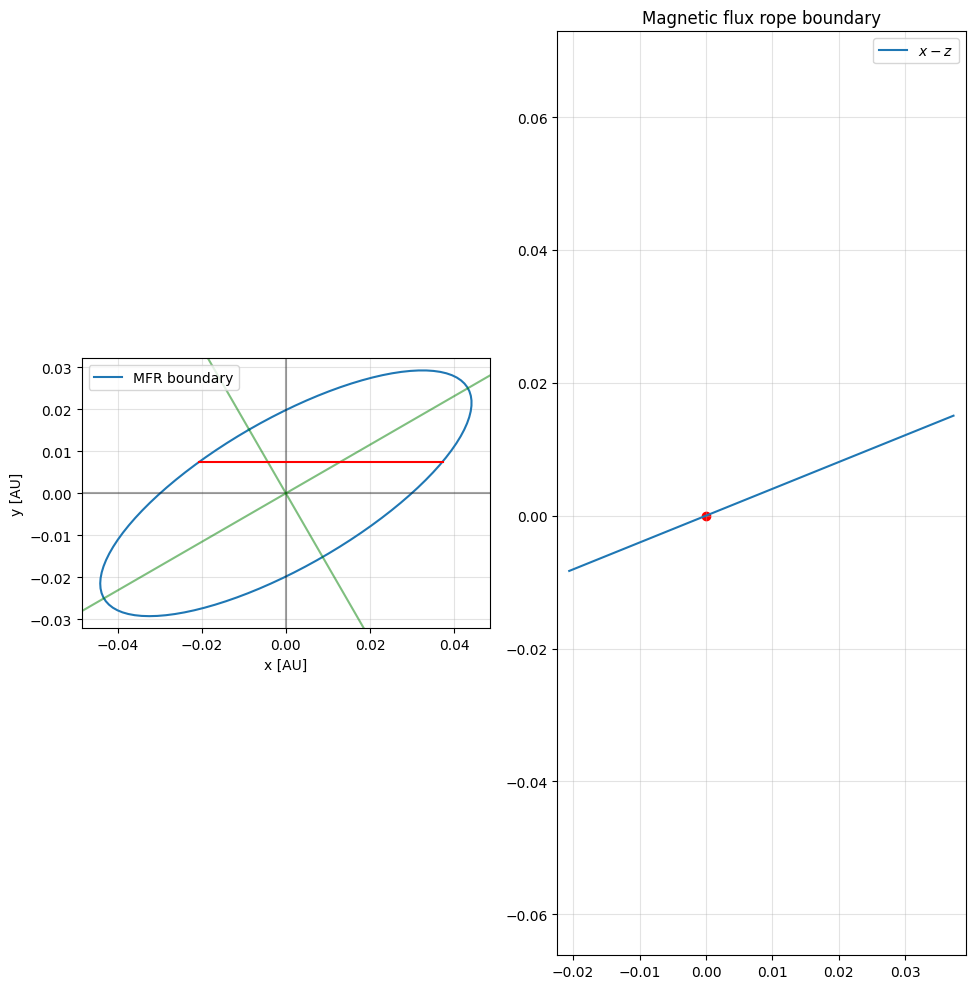

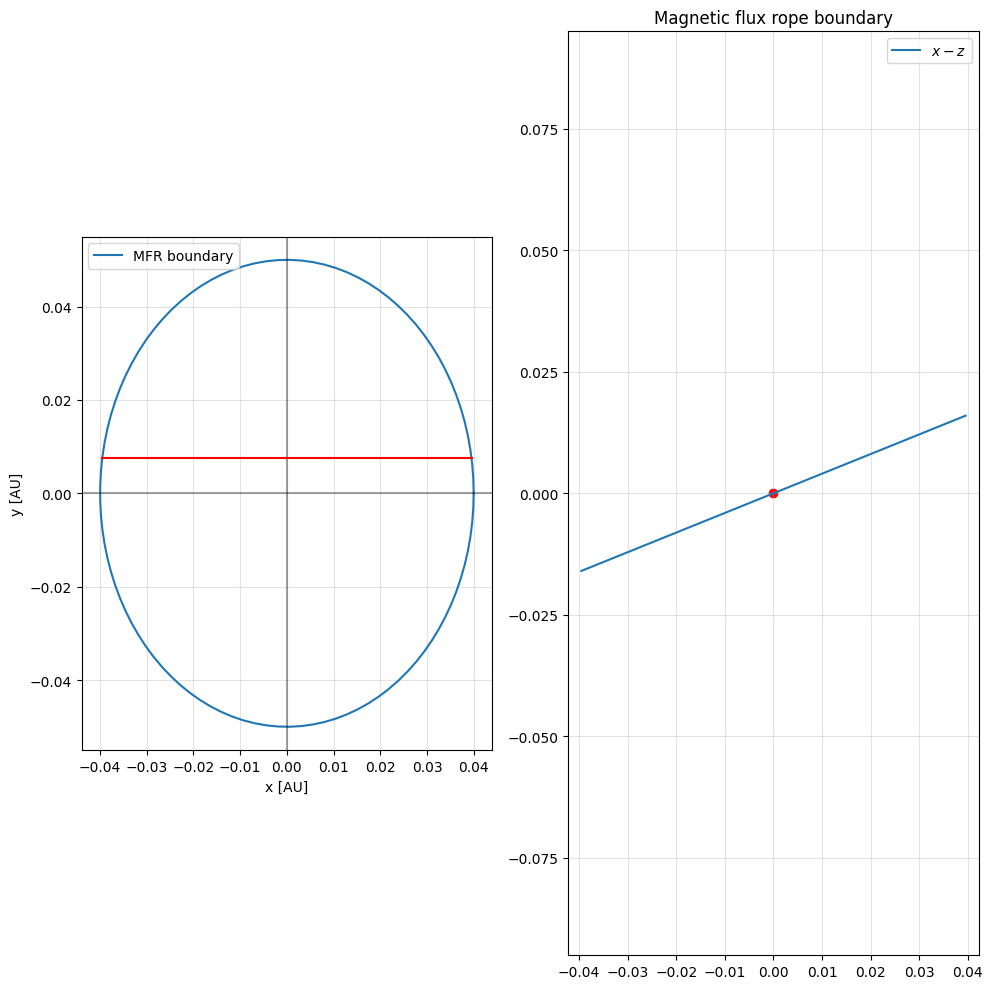

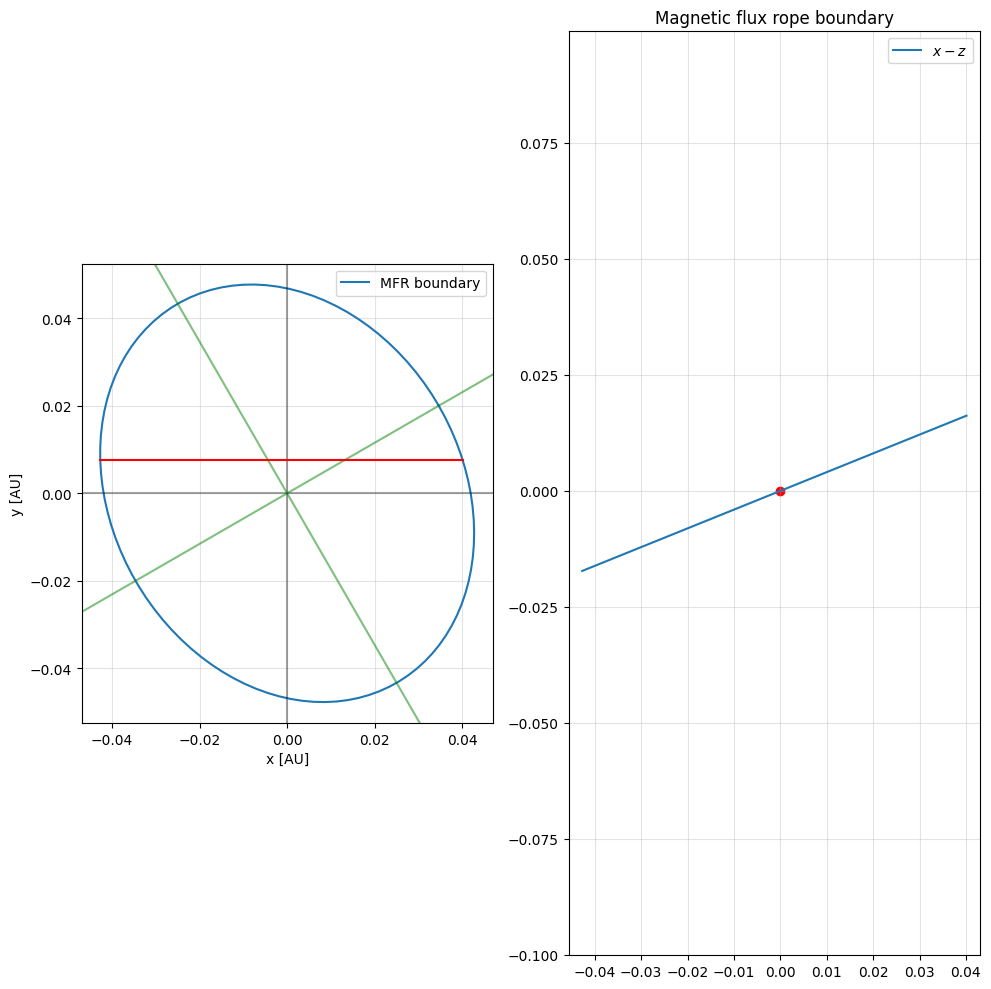

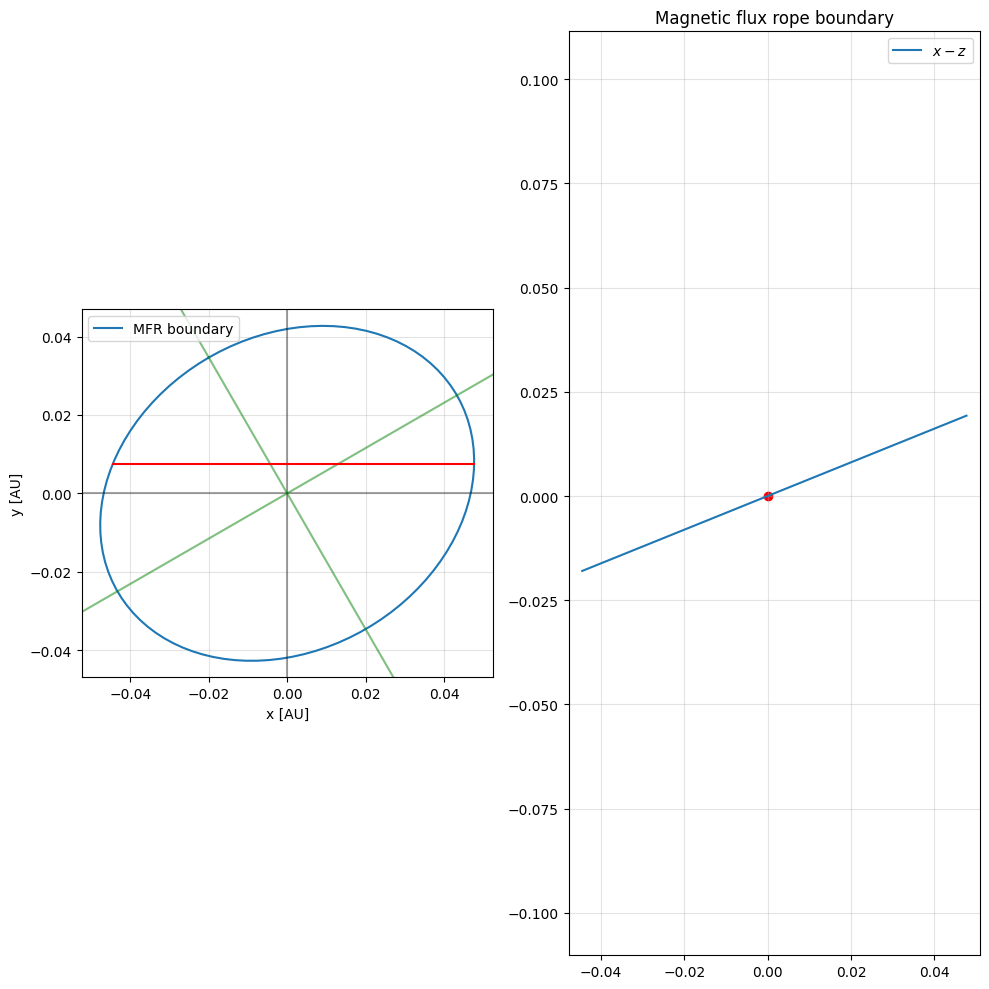

In [3]:
for delta in [0.35, 0.8]:
    for psi_deg in [0, 30, 120]:
        simple_ec_model = ECModel(delta=delta, psi=math.radians(psi_deg))
        df = simple_ec_model.simulate_crossing(v_sc=450, y_0=0.15, theta=math.radians(22), time_stencil=11)

        fig, ax = plt.subplots(1, 2, figsize=(10, 10), tight_layout=True)
        simple_ec_model.plot_boundary(axis=ax[0])
        ax[0].plot(df["x"], df["y"], c="r", label="Magnetic field line")

        ax[1].plot(df["x"], df["z"], label="$x-z$")
        ax[1].scatter([0], [0], c="r")
        ax[1].legend()
        ax[1].axis("equal")
        ax[1].grid(alpha=0.35)
        plt.show()

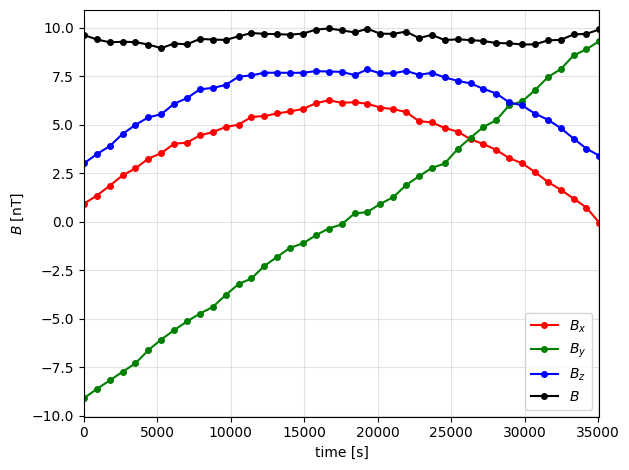

In [43]:
Y_0 = 0.15
DELTA: float = 0.75
PSI_DEG: float = 10
THETA_DEG: float = -45
simple_ec_model = ECModel(delta=DELTA, psi=math.radians(PSI_DEG))
df = simple_ec_model.simulate_crossing(v_sc=450, y_0=Y_0, theta=math.radians(THETA_DEG), time_stencil=41, noise_type="gaussian", epsilon=0.1)
simple_ec_model.plot_vs_time(df, ["B_x", "B_y", "B_z", "B"], colour=["r", "g", "b", "k"])

In [44]:
model_params = {
    "delta": {"mode": "optimised", "initial_value": 0.8, "bounds": [0.5, 1]},
    "psi": {"mode": "optimised", "initial_value": math.radians(45), "bounds": [1e-3, math.radians(180 - 1e-3)]},
    "tau": {"mode": "optimised", "initial_value": 1.4, "bounds": [0.1, 2.0]},
    "B_z_0": {"mode": "optimised", "initial_value": 8.0, "bounds": [1, 20]}
}

crossing_params = {
    "y_0": {"mode": "optimised", "initial_value": 0.0, "bounds": [-0.95, 0.95]},
    "v_sc": {"mode": "fixed", "value": 450.0},
    "theta": {"mode": "optimised", "initial_value": 0, "bounds": [-math.radians(89), math.radians(89)]},
}

fitted_model, optimal_crossing_parameters, df_fitted, opt_info = ECModel.fit(ECModel, df, model_params, crossing_params)

In [45]:
fitted_model

ECModel with parameters:
        - Geometrical:
            - delta = 0.746
            - psi = 9.601 deg
            - R = 0.050 AU
        - Field:
            - n = 1
            - m = 0
            - tau = 1.309
            - C_nm = 1.000
            - B_z_0 = 9.985 nT
            - handedness = 1.

In [46]:
optimal_crossing_parameters

{'y_0': np.float64(0.1464813030817697),
 'theta': np.float64(-0.7790555727558154),
 'v_sc': 450.0,
 'time_stencil': array([    0.        ,   877.21175507,  1754.42351014,  2631.63526521,
         3508.84702028,  4386.05877535,  5263.27053042,  6140.48228549,
         7017.69404056,  7894.90579563,  8772.1175507 ,  9649.32930577,
        10526.54106084, 11403.75281591, 12280.96457098, 13158.17632605,
        14035.38808112, 14912.59983619, 15789.81159126, 16667.02334633,
        17544.2351014 , 18421.44685647, 19298.65861154, 20175.87036661,
        21053.08212168, 21930.29387675, 22807.50563182, 23684.71738689,
        24561.92914196, 25439.14089704, 26316.35265211, 27193.56440718,
        28070.77616225, 28947.98791732, 29825.19967239, 30702.41142746,
        31579.62318253, 32456.8349376 , 33334.04669267, 34211.25844774,
        35088.47020281])}

In [47]:
math.degrees(optimal_crossing_parameters["theta"])

-44.636596325055265

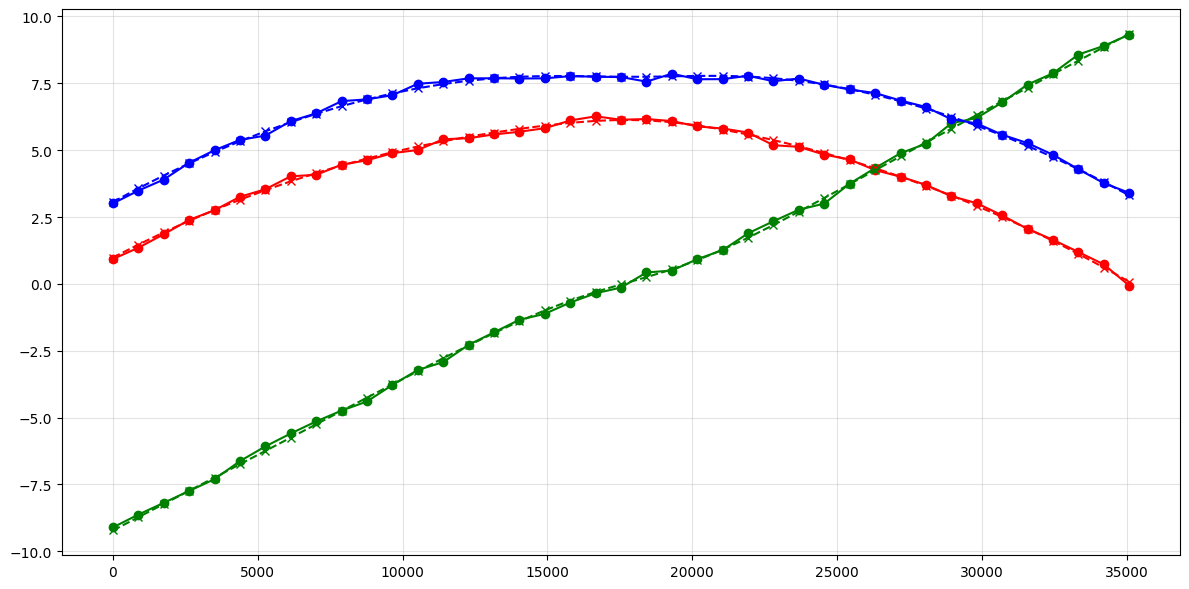

In [48]:
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
ax.plot(df["time"], df["B_x"], "-or")
ax.plot(df["time"], df["B_y"], "-og")
ax.plot(df["time"], df["B_z"], "-ob")
ax.plot(df_fitted["time"], df_fitted["B_x"], "--xr")
ax.plot(df_fitted["time"], df_fitted["B_y"], "--xg")
ax.plot(df_fitted["time"], df_fitted["B_z"], "--xb")
ax.grid(alpha=0.35)


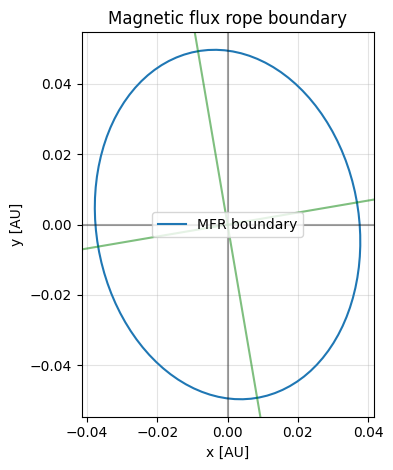

In [42]:
fitted_model.plot_boundary()